In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [2]:
#Can only try 4,5 or 6 for i

i=0
#files=sorted(glob("/home/abubakr/Desktop/*sync*csv"))
#files=sorted(glob("processed_data/*26*/"+str(i)+"*/*sync*csv"))
files=sorted(glob("/home/uwr/Desktop/26Jan_2024_01_26_16_26_18_sync*.csv"))
files

['/home/uwr/Desktop/26Jan_2024_01_26_16_26_18_sync.csv',
 '/home/uwr/Desktop/26Jan_2024_01_26_16_26_18_sync_imu.csv']

In [3]:
df1=pd.read_csv(files[0])
df2=pd.read_csv(files[1])

In [4]:
df1["Timestamp"]=np.array(df1["Timestamp"]/np.power(10,9),np.float128)
df1.head()


,Timestamp,Pose_X,Pose_Y,Pose_Z,Sonar_Distance_1,Sonar_Distance_2,Sonar_Distance_3,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1.706236e+09,-0.000038,-1.339620e-05,-3.762975e-05,0.815000,0.0,0.0,0.001257,-0.006476,-0.013599
1,1.706236e+09,-0.001689,-4.898048e-05,-8.146487e-05,0.816333,0.0,0.0,0.000429,-0.004435,-0.021529
2,1.706236e+09,-0.003412,-1.748222e-05,-9.256414e-05,0.818667,0.0,0.0,-0.002228,-0.002559,-0.019419
3,1.706236e+09,-0.007141,-7.773794e-08,-2.102061e-07,0.821000,0.0,0.0,0.002498,-0.001608,-0.004344
4,1.706236e+09,-0.008560,-8.785257e-06,-7.847990e-06,0.823667,0.0,0.0,-0.003852,0.001321,-0.000341


In [5]:
df2["Timestamp"]=np.array(df2["Timestamp"]/np.power(10,9),np.float128)
df2.head()

,Timestamp,IMU_Raw_x,IMU_Raw_y,IMU_Raw_z,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1.706236e+09,0.107599,9.768851,-0.982107,-0.000713,-0.003081,0.000281
1,1.706236e+09,0.099315,9.769201,-0.986316,-0.001782,-0.002697,0.001799
2,1.706236e+09,0.101487,9.768181,-0.990177,-0.002107,-0.002263,0.002636
3,1.706236e+09,0.099575,9.773252,-0.998623,-0.001993,-0.001822,0.002515
4,1.706236e+09,0.093412,9.775958,-0.995065,-0.001991,-0.001371,0.001294


In [31]:
import numpy as np


# Replace # ... with the actual time differences
time_diff = np.diff(df1["Timestamp"])

# Compute the average time difference
average_time_diff = np.mean(time_diff)

# Compute the frequency (inverse of the average time difference)
frequency = 1 / average_time_diff

print("Frequency:", frequency, "Hz")


Frequency: 8.101702763776309556 Hz


In [32]:
import numpy as np


# Replace # ... with the actual time differences
time_diff = np.diff(df2["Timestamp"])

# Compute the average time difference
average_time_diff = np.mean(time_diff)

# Compute the frequency (inverse of the average time difference)
frequency = 1 / average_time_diff

print("Frequency:", frequency, "Hz")


Frequency: 54.037758670279148285 Hz


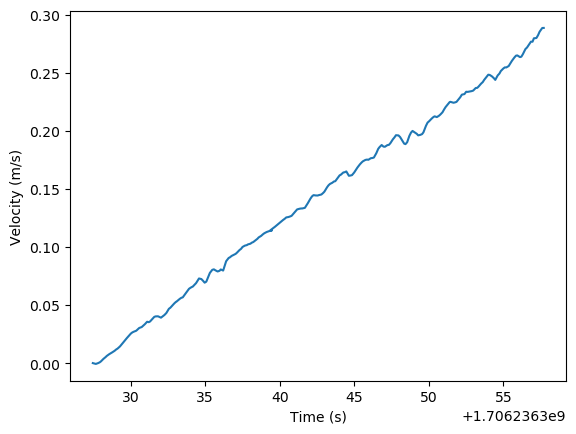

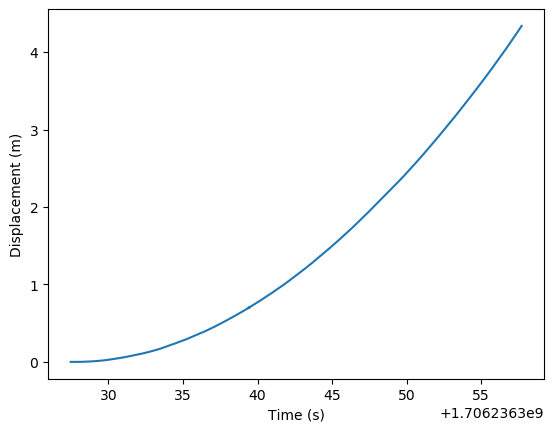

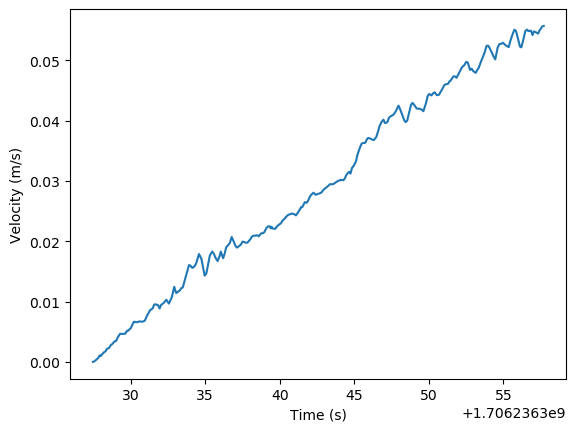

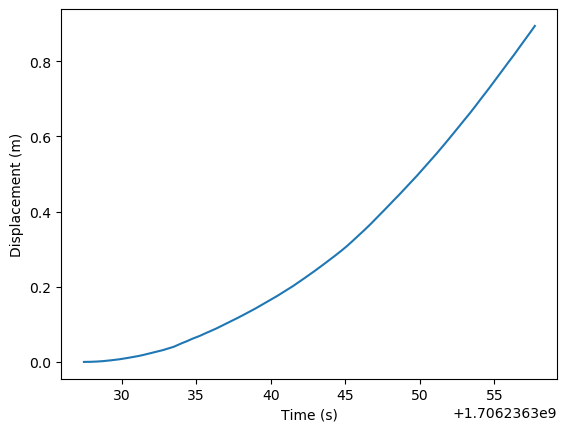

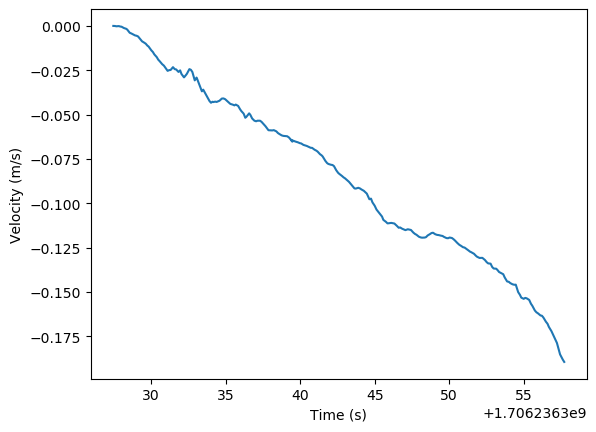

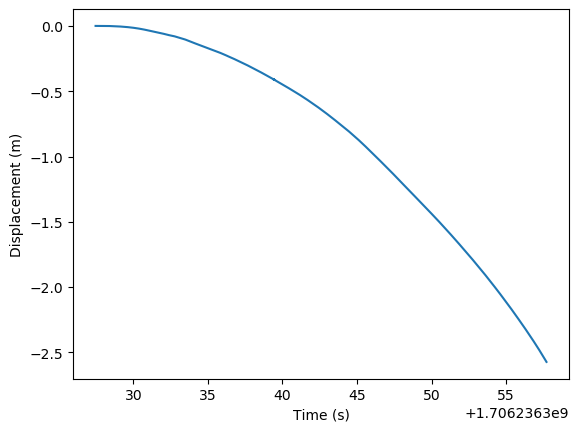

In [6]:
def create_v_d(accs,imus):
    vels=[]
    prev_time=imus.iloc[0]["Timestamp"]
    bias=imus.iloc[0][accs]
    prev_acc=0
    prev_vel=0
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        vel_d=0.5*(prev_acc+x[accs]-bias)*(x["Timestamp"]-prev_time)
        vel=prev_vel+vel_d
        prev_vel=vel
        prev_time=x["Timestamp"]
        vels.append(vel)
    plt.figure()
    plt.ylabel("Velocity (m/s)")
    plt.xlabel("Time (s)")
    plt.plot(np.array(imus.iloc[:]["Timestamp"]),vels)
    i=0
    prev_s=0
    prev_time=imus.iloc[0]["Timestamp"]
    dists=[]
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        s=prev_s+vels[i]*(x["Timestamp"]-prev_time)+0.5*0.5*(prev_acc+x[accs]-bias)*np.square(x["Timestamp"]-prev_time)
        prev_s=s
        prev_vel=vel
        prev_time=x["Timestamp"]
        dists.append(s)
        i+=1
    plt.figure()
    plt.ylabel("Displacement (m)")
    plt.xlabel("Time (s)")
    plt.plot(np.array(imus.iloc[:]["Timestamp"]),dists)
    return vels,dists
z_v,z_d=create_v_d("IMU_Linear_Acc_Z",df1)
y_v,y_d=create_v_d("IMU_Linear_Acc_Y",df1)
x_v,x_d=create_v_d("IMU_Linear_Acc_X",df1)

In [7]:
fls=pd.read_csv("/home/uwr/Desktop/2023_UWR/Analysis/processed_data/26Jan/FLS/11_13_03_Camera_sync.csv")
fls_t=np.array(fls["TimeStamp"]-fls["TimeStamp"][0],np.float128)/np.power(10,9)
fls_x=np.array((fls["Center_X"]-fls["Center_X"][0])*0.65/fls["Center_X"][0])
fls_y=np.array((fls["Center_Y"]-fls["Center_Y"][0])*1/fls["Center_Y"][0])

In [8]:
fls_t

array([ 0.        ,  0.9994247 ,  1.9955349 ,  2.99586654,  3.99809241,
        4.99555516,  5.99678016,  6.99622989,  7.99651599,  8.99746561,
        9.99562812, 11.00281167, 11.99602842, 12.99623895, 14.00136471,
       14.9953301 , 15.99600196, 16.99956179, 17.99606752, 18.99772573,
       19.99681759, 20.99861789, 21.99839258, 22.99821615, 23.99970412,
       24.99598718, 25.9957211 , 26.99728155, 27.9988935 , 28.99959183,
       29.99882531, 30.99726486, 31.99945664, 32.99884486, 33.99799395,
       34.9971416 , 35.99586916, 36.99693227, 37.99651241], dtype=float128)

In [9]:
np.array(df1["Timestamp"]-df1["Timestamp"][0])

array([ 0.        ,  0.11012006,  0.20212865,  0.37058091,  0.47046375,
        0.54982042,  0.71026611,  0.86051178,  0.93083858,  1.10044026,
        1.20315981,  1.29076338,  1.46032906,  1.5609622 ,  1.66020012,
        1.82027531,  1.93012333,  2.02086329,  2.17111206,  2.2902391 ,
        2.36117268,  2.55120206,  2.65197706,  2.7507031 ,  2.91124511,
        3.0104022 ,  3.11057591,  3.28029323,  3.39055872,  3.49147177,
        3.64072752,  3.75129747,  3.84053087,  4.00097752,  4.12086034,
        4.21047974,  4.37132096,  4.4808681 ,  4.57063198,  4.74055743,
        4.80100679,  4.93057609,  5.10124636,  5.20043039,  5.30103803,
        5.46070671,  5.58058548,  5.60124874,  5.83076286,  5.93981338,
        6.030231  ,  6.4500196 ,  6.55033612,  6.65002537,  6.69995832,
        6.83444405,  6.92573357,  7.11969113,  7.28035593,  7.39097214,
        7.50018883,  7.61045861,  7.75059271,  7.84979248,  8.01111627,
        8.12058687,  8.2097044 ,  8.37037063,  8.50092459,  8.57

In [22]:
gt_d=[0,1.3]
gt_t=[0,df1["Timestamp"][len(df1)-1]-df1["Timestamp"][0]]

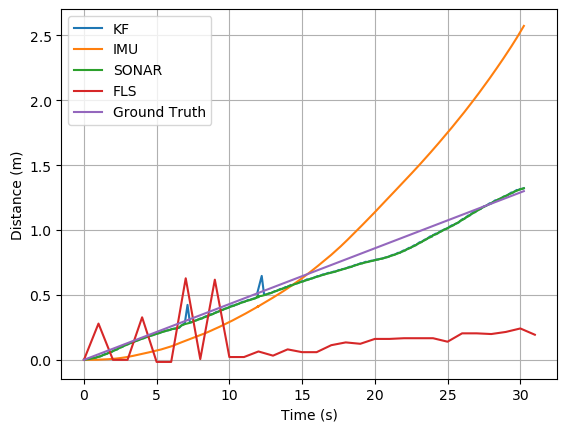

In [28]:
plt.plot(np.array(df1["Timestamp"]-df1["Timestamp"][0]),np.array(df1["Pose_X"])*-1)
plt.plot(np.array(df1["Timestamp"]-df1["Timestamp"][0]),np.array(x_d)*-1)
plt.plot(np.array(df1["Timestamp"]-df1["Timestamp"][0]),np.array(df1["Sonar_Distance_1"]-df1["Sonar_Distance_1"][0]))
plt.plot(fls_t[:32],fls_x[:32]*-1)
plt.plot(gt_t,gt_d)
plt.legend(["KF","IMU","SONAR","FLS","Ground Truth"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (s)")
plt.savefig(str(i)+"_x_kf.png")
plt.grid()

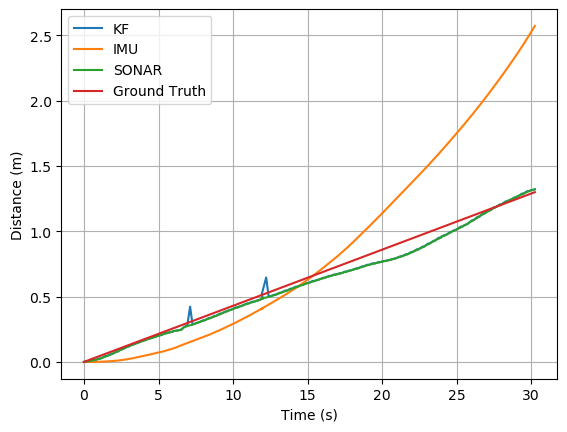

In [29]:
plt.plot(np.array(df1["Timestamp"]-df1["Timestamp"][0]),np.array(df1["Pose_X"])*-1)
plt.plot(np.array(df1["Timestamp"]-df1["Timestamp"][0]),np.array(x_d)*-1)
plt.plot(np.array(df1["Timestamp"]-df1["Timestamp"][0]),np.array(df1["Sonar_Distance_1"]-df1["Sonar_Distance_1"][0]))
#plt.plot(fls_t[:32],fls_x[:32]*-1)
plt.plot(gt_t,gt_d)
plt.legend(["KF","IMU","SONAR","Ground Truth"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (s)")
plt.savefig(str(i)+"_x_kf.png")
plt.grid()

Text(0, 0.5, 'Distance (m)')

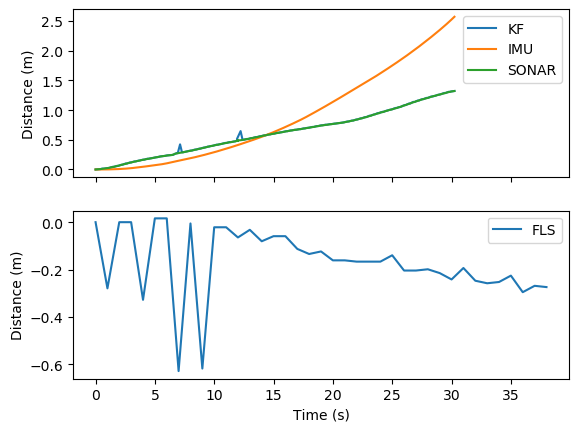

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot for the first subplot (top)
ax1.plot(np.array(df1["Timestamp"] - df1["Timestamp"][0]), np.array(df1["Pose_X"]) * -1)
ax1.plot(np.array(df1["Timestamp"] - df1["Timestamp"][0]), np.array(x_d) * -1)
ax1.plot(np.array(df1["Timestamp"] - df1["Timestamp"][0]), np.array(df1["Sonar_Distance_1"] - df1["Sonar_Distance_1"][0]))
ax1.legend(["KF", "IMU","SONAR"])
ax1.set_ylabel("Distance (m)")

# Plot for the second subplot (bottom)
ax2.plot(fls_t,fls_x)
ax2.legend(["FLS"])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Distance (m)")

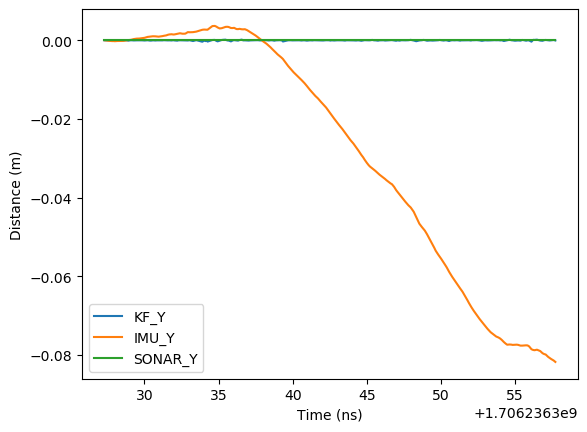

In [78]:
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Pose_Y"]))
plt.plot(np.array(df1["Timestamp"]),np.array(y_d))
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Sonar_Distance_2"]-df1["Sonar_Distance_2"][0]))
plt.legend(["KF_Y","IMU_Y","SONAR_Y"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_kf.png")

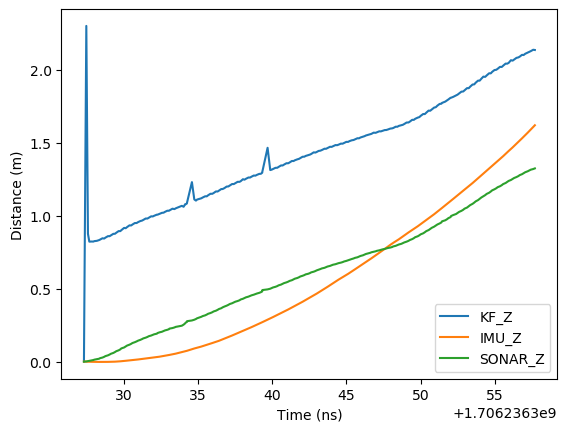

In [79]:
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Pose_Z"])*-1)
plt.plot(np.array(df1["Timestamp"]),np.array(z_d)*1)
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Sonar_Distance_3"]-df1["Sonar_Distance_3"][0]))
plt.legend(["KF_Z","IMU_Z","SONAR_Z"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_kf.png")

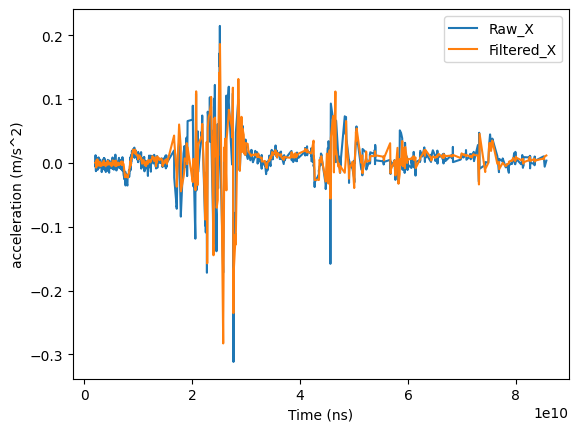

In [21]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_x"]-df2["IMU_Raw_x"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_X"]-df2["IMU_Linear_Acc_X"][0])*1)
plt.legend(["Raw_X","Filtered_X"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_bw.png")

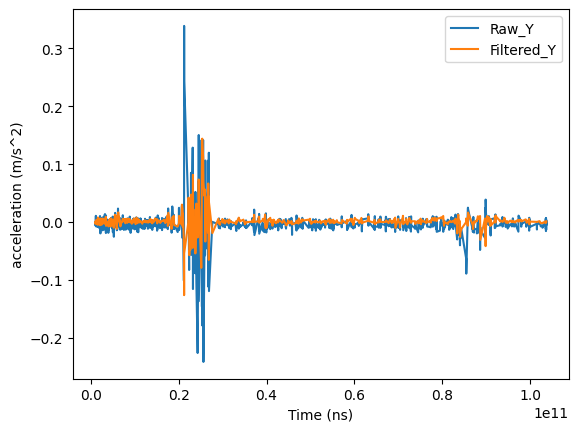

In [11]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_y"]-df2["IMU_Raw_y"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Y"]-df2["IMU_Linear_Acc_Y"][0])*1)
plt.legend(["Raw_Y","Filtered_Y"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_bw.png")

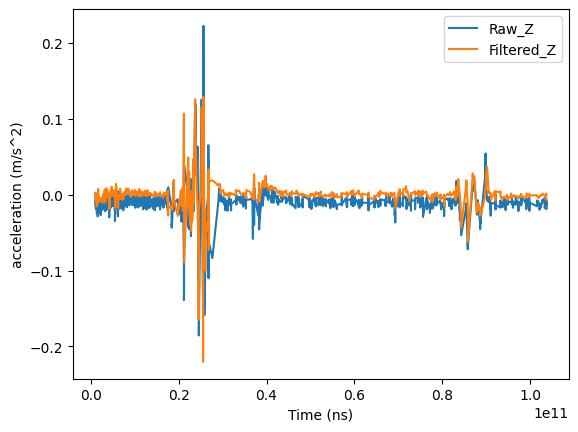

In [12]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_z"]-df2["IMU_Raw_z"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Z"]-df2["IMU_Linear_Acc_Z"][0])*1)
plt.legend(["Raw_Z","Filtered_Z"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_bw.png")

# Other code

In [159]:
df3=pd.read_csv("/home/abubakr/Desktop/imu.csv")
df4=pd.read_csv("/home/abubakr/Desktop/imu2.csv")

In [92]:
df3.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.orientation.x,field.orientation.y,field.orientation.z,field.orientation.w,field.orientation_covariance0,field.orientation_covariance1,...,field.linear_acceleration.z,field.linear_acceleration_covariance0,field.linear_acceleration_covariance1,field.linear_acceleration_covariance2,field.linear_acceleration_covariance3,field.linear_acceleration_covariance4,field.linear_acceleration_covariance5,field.linear_acceleration_covariance6,field.linear_acceleration_covariance7,field.linear_acceleration_covariance8
0,1702464251867193783,62,1145229339,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1702464251870371765,63,1149715423,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.471815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1702464251873468098,64,1167288780,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.479011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1702464251875591263,65,1174196481,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.467270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1702464251877241763,66,1189620733,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.469086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df4.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.vector.x,field.vector.y,field.vector.z
0,1702464251867193783,0,1145229339,NaN,-0.002749,0.011357,0.007850
1,1702464251870371765,0,1149715423,NaN,-0.002404,0.011406,0.007854
2,1702464251873468098,0,1167288780,NaN,-0.002086,0.011324,0.008056
3,1702464251875591263,0,1174196481,NaN,-0.001812,0.011153,0.008423
4,1702464251877241763,0,1189620733,NaN,-0.001596,0.010961,0.008897


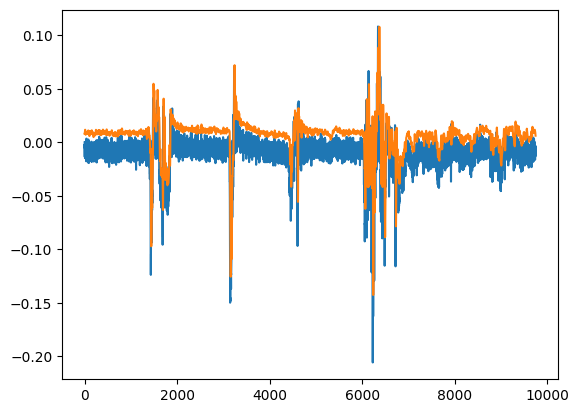

In [94]:
plt.plot(df3["field.linear_acceleration.z"]-df3["field.linear_acceleration.z"][0])
plt.plot(df4["field.vector.z"])

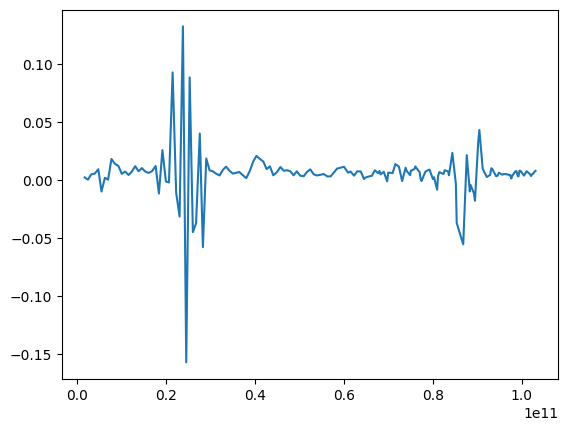

In [174]:
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Z"])

In [96]:
len(df4)

9745

In [97]:
len(df2)

1295